In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

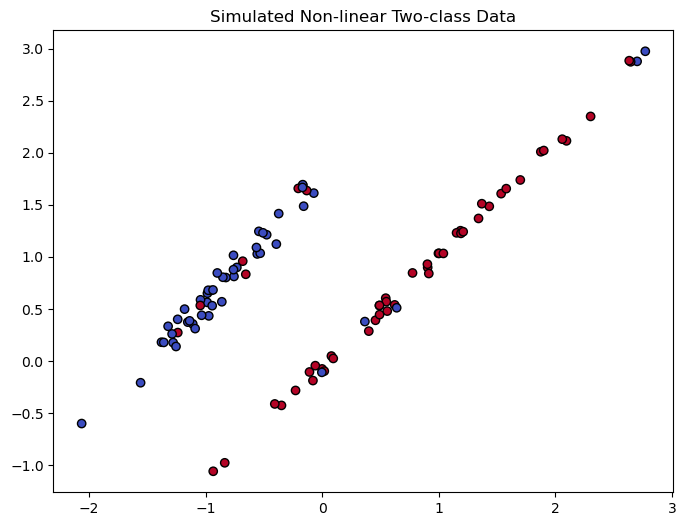

In [2]:
# Create dataset with non-linear separation
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, class_sep=0.8, random_state=42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot dataset
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Simulated Non-linear Two-class Data")
plt.show()


In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear Kernel
svc_linear = SVC(kernel='linear').fit(X_train, y_train)

# Polynomial Kernel (degree=3)
svc_poly = SVC(kernel='poly', degree=3).fit(X_train, y_train)

# RBF Kernel
svc_rbf = SVC(kernel='rbf').fit(X_train, y_train)


In [4]:
models = {'Linear': svc_linear, 'Polynomial': svc_poly, 'RBF': svc_rbf}
results = []

for name, model in models.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_error = 1 - accuracy_score(y_train, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)
    results.append((name, train_error, test_error))

# Display results
import pandas as pd
results_df = pd.DataFrame(results, columns=['Model','Train Error','Test Error'])
print(results_df)


        Model  Train Error  Test Error
0      Linear          0.1    0.166667
1  Polynomial          0.1    0.166667
2         RBF          0.1    0.166667


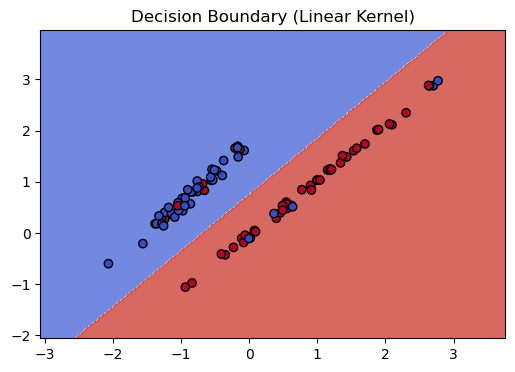

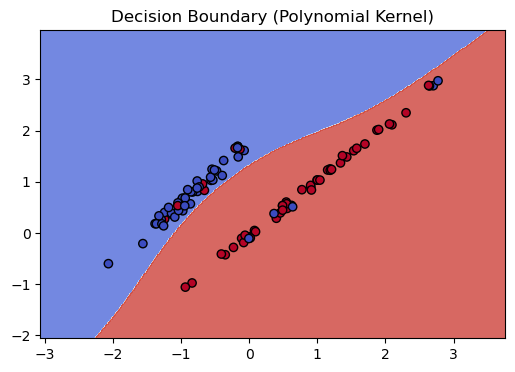

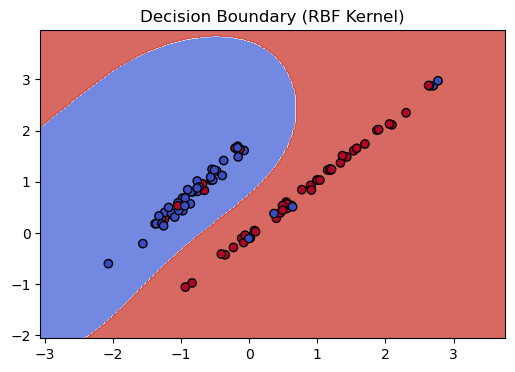

In [5]:
# Visualize decision boundaries for each model

from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6,4))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.show()

for name, model in models.items():
    plot_decision_boundary(model, X, y, f"Decision Boundary ({name} Kernel)")


In [6]:
# Determine which technique performs best on the test set

best_model = results_df.sort_values(by='Test Error').iloc[0]
print("Best performing model on test set:", best_model['Model'])


Best performing model on test set: Linear
